In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_local')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
genes_metadata = pd.read_csv('Ireland_2020/info_for_justin.csv')
genes_metadata

,gene,RNAP_start,RNAP_end,TF_start,TF_end,notes
0,bdcR,80,110,90,100,NaN
1,tig,79,109,109,119,only active in M9 and heat conditions
2,tff,79,108,108,117,only active in heat and SS
3,yehU,83,113,65,90,only active in anaero
4,yjjJ,103,132,143,158,has second TF in SS growth and the main TF is...
5,aphA,78,108,46,65,only active in anaero
6,yedJ,60,90,100,110,NaN
7,yeiQ,76,108,36,56,only active in anaero
8,ykgE,49,79,79,95,in anaero there is a second active TF while th...
9,thiM,79,109,109,120,most active in M9 and heat


In [3]:
# pick a gene to analyze 
gene_name = 'tig'
rnap_start = genes_metadata.loc[genes_metadata['gene']==gene_name].values[0][1]
rnap_end = genes_metadata.loc[genes_metadata['gene']==gene_name].values[0][2]
tf_start = genes_metadata.loc[genes_metadata['gene']==gene_name].values[0][3]
tf_end = genes_metadata.loc[genes_metadata['gene']==gene_name].values[0][4]
rnap_end-rnap_start

30

In [4]:
print(rnap_start,rnap_end,tf_start,tf_end)

79 109 109 119


In [5]:
import glob

path_to_data = 'Ireland_2020/datasets_for_justin/'
dataset_paths = []
for dataset in glob.glob(path_to_data+gene_name+'*'):
    print(dataset)
    dataset_paths.append(dataset)

Ireland_2020/datasets_for_justin/tigAnaerodataset_alldone_with_large
Ireland_2020/datasets_for_justin/tigarabinosedataset_alldone_with_large
Ireland_2020/datasets_for_justin/tigFedataset_alldone_with_large
Ireland_2020/datasets_for_justin/tigheatdataset_alldone_with_large
Ireland_2020/datasets_for_justin/tigLBdataset_alldone_with_large
Ireland_2020/datasets_for_justin/tigM9dataset_alldone_with_large
Ireland_2020/datasets_for_justin/tigmetaldataset_alldone_with_large
Ireland_2020/datasets_for_justin/tigSSdataset_alldone_with_large
Ireland_2020/datasets_for_justin/tigTredataset_alldone_with_large
Ireland_2020/datasets_for_justin/tigxanth2dataset_alldone_with_large
Ireland_2020/datasets_for_justin/tigxylaradataset_alldone_with_large


In [6]:
dataset_df = pd.read_csv(dataset_paths[1],delim_whitespace=True)
dataset_df

,ct,ct_0,ct_1,seq
0,34.0,19.0,15.0,AGTCTGCTTTTTGCCCAGCATTAATACGAAATTTCCCCGGGAATTC...
1,8.0,4.0,4.0,AGTCTGCTTTTTGCCCAGCATTAATACGAAATTTCCCCGGGAATTC...
2,10.0,3.0,7.0,AGTCTGCTTTTTGCCCAGCATTAATACGAAATTTCCCCGGGAATTC...
3,4.0,1.0,3.0,AGTCTGCTTTTTGCCCAGCATTAATACGAAATTTCCCCGGGAATTC...
4,36.0,28.0,8.0,AGTCTGCTTTTTGCCCAGCATTAATACGAAATTTCCCCGGGAATTC...
...,...,...,...,...
9416,11.0,11.0,0.0,TTTTGGGTTTTTGCCCAGCATTCAGACGAAAATTGCCCGGGAATTG...
9417,69.0,42.0,27.0,TTTTGGGTTTTTGCCCAGCATTCAGACGAAAATTGCCCGGGAATTG...
9418,141.0,116.0,25.0,TTTTGGGTTTTTGCCCAGCATTCAGACGAAAATTGCCCGGGAATTG...
9419,10.0,10.0,0.0,TTTTTACTTTTTGCCCAGCATTCAGTCGAAAATTACCCGAGATTTT...


In [7]:
L = len(dataset_df['seq'][0])

In [8]:
del dataset_df['ct']

In [9]:
y = dataset_df[['ct_0', 'ct_1']].values
X = dataset_df['seq'].values

In [10]:
Y = y.shape[1]

In [11]:
# define custom gp_map parameters dictionary
gpmap_kwargs = {'TF_start':tf_start,
                'TF_end':tf_end,
                'RNAP_start':rnap_start,
                'RNAP_end':rnap_end,
                'regularizer':0.1}

# Create model
model = mavenn.Model(L=L, 
                     Y=Y,
                     alphabet='dna', 
                     regression_type='MPA', 
                     gpmap_type='thermodynamic',
                     mpa_hidden_nodes=2,
                     gpmap_kwargs=gpmap_kwargs,)

In [12]:
from sklearn.model_selection import train_test_split

# step 3 from pseudo-codegit
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [13]:
# Set training data
model.set_data(x=x_train,
               y=y_train,
               #validation_flags=(data_df['set']=='validation'),
               shuffle=True)

# Fit model to data
model.fit(learning_rate=.00005,
          epochs=1000,
          batch_size=32,
          early_stopping=True,
          early_stopping_patience=25,
          linear_initialization=True)


N = 8,478 observations set as training data.
Using 20.3% for validation.
Data shuffled.
Time to set data: 0.243 sec.
Epoch 1/1000
212/212 [==============================] - 3s 4ms/step - loss: 457.9126 - I_var: -4.9547e-04 - val_loss: 442.1167 - val_I_var: -0.0012
Epoch 2/1000
212/212 [==============================] - 0s 1ms/step - loss: 451.3081 - I_var: -5.2918e-04 - val_loss: 442.0258 - val_I_var: -0.0012
Epoch 3/1000
212/212 [==============================] - 0s 1ms/step - loss: 452.2346 - I_var: -4.3599e-05 - val_loss: 441.9438 - val_I_var: -0.0012
Epoch 4/1000
212/212 [==============================] - 0s 1ms/step - loss: 450.2114 - I_var: 2.1902e-04 - val_loss: 441.8704 - val_I_var: -0.0013
Epoch 5/1000
212/212 [==============================] - 0s 1ms/step - loss: 480.2406 - I_var: 7.4991e-05 - val_loss: 441.8002 - val_I_var: -0.0013
Epoch 6/1000
212/212 [==============================] - 0s 1ms/step - loss: 459.6217 - I_var: 5.3068e-04 - val_loss: 441.7318 - val_I_var: -0.001

212/212 [==============================] - 0s 1ms/step - loss: 444.3961 - I_var: 0.0239 - val_loss: 432.5939 - val_I_var: 0.0188
Epoch 57/1000
212/212 [==============================] - 0s 1ms/step - loss: 457.8435 - I_var: 0.0246 - val_loss: 432.2773 - val_I_var: 0.0195
Epoch 58/1000
212/212 [==============================] - 0s 1ms/step - loss: 452.4048 - I_var: 0.0256 - val_loss: 431.9574 - val_I_var: 0.0203
Epoch 59/1000
212/212 [==============================] - 0s 1ms/step - loss: 435.6786 - I_var: 0.0267 - val_loss: 431.6394 - val_I_var: 0.0211
Epoch 60/1000
212/212 [==============================] - 0s 1ms/step - loss: 446.8613 - I_var: 0.0281 - val_loss: 431.3540 - val_I_var: 0.0217
Epoch 61/1000
212/212 [==============================] - 0s 1ms/step - loss: 457.7278 - I_var: 0.0286 - val_loss: 431.0122 - val_I_var: 0.0226
Epoch 62/1000
212/212 [==============================] - 0s 1ms/step - loss: 440.4112 - I_var: 0.0295 - val_loss: 430.7090 - val_I_var: 0.0233
Epoch 63/1000

212/212 [==============================] - 0s 1ms/step - loss: 416.3748 - I_var: 0.0827 - val_loss: 411.3728 - val_I_var: 0.0704
Epoch 114/1000
212/212 [==============================] - 0s 1ms/step - loss: 435.3994 - I_var: 0.0832 - val_loss: 411.0092 - val_I_var: 0.0713
Epoch 115/1000
212/212 [==============================] - 0s 1ms/step - loss: 404.2471 - I_var: 0.0841 - val_loss: 410.6553 - val_I_var: 0.0722
Epoch 116/1000
212/212 [==============================] - 0s 1ms/step - loss: 421.4729 - I_var: 0.0855 - val_loss: 410.3111 - val_I_var: 0.0730
Epoch 117/1000
212/212 [==============================] - 0s 1ms/step - loss: 408.7794 - I_var: 0.0855 - val_loss: 409.9664 - val_I_var: 0.0738
Epoch 118/1000
212/212 [==============================] - 0s 1ms/step - loss: 421.6561 - I_var: 0.0869 - val_loss: 409.6145 - val_I_var: 0.0747
Epoch 119/1000
212/212 [==============================] - 0s 1ms/step - loss: 415.0140 - I_var: 0.0878 - val_loss: 409.2664 - val_I_var: 0.0756
Epoch 1

Epoch 170/1000
212/212 [==============================] - 0s 1ms/step - loss: 397.3507 - I_var: 0.1222 - val_loss: 398.1085 - val_I_var: 0.1039
Epoch 171/1000
212/212 [==============================] - 0s 1ms/step - loss: 400.2265 - I_var: 0.1248 - val_loss: 398.0066 - val_I_var: 0.1042
Epoch 172/1000
212/212 [==============================] - 0s 1ms/step - loss: 392.1712 - I_var: 0.1232 - val_loss: 397.8984 - val_I_var: 0.1045
Epoch 173/1000
212/212 [==============================] - 0s 1ms/step - loss: 396.9133 - I_var: 0.1248 - val_loss: 397.7960 - val_I_var: 0.1048
Epoch 174/1000
212/212 [==============================] - 0s 1ms/step - loss: 402.0793 - I_var: 0.1257 - val_loss: 397.7122 - val_I_var: 0.1050
Epoch 175/1000
212/212 [==============================] - 0s 1ms/step - loss: 390.1785 - I_var: 0.1266 - val_loss: 397.6121 - val_I_var: 0.1053
Epoch 176/1000
212/212 [==============================] - 0s 1ms/step - loss: 385.8284 - I_var: 0.1252 - val_loss: 397.5259 - val_I_var:

Epoch 227/1000
212/212 [==============================] - 0s 1ms/step - loss: 394.1855 - I_var: 0.1367 - val_loss: 394.8827 - val_I_var: 0.1126
Epoch 228/1000
212/212 [==============================] - 0s 1ms/step - loss: 399.3607 - I_var: 0.1354 - val_loss: 394.9026 - val_I_var: 0.1126
Epoch 229/1000
212/212 [==============================] - 0s 1ms/step - loss: 394.8679 - I_var: 0.1384 - val_loss: 394.8671 - val_I_var: 0.1127
Epoch 230/1000
212/212 [==============================] - 0s 1ms/step - loss: 396.2896 - I_var: 0.1385 - val_loss: 394.8333 - val_I_var: 0.1128
Epoch 231/1000
212/212 [==============================] - 0s 1ms/step - loss: 389.3864 - I_var: 0.1347 - val_loss: 394.7781 - val_I_var: 0.1129
Epoch 232/1000
212/212 [==============================] - 0s 1ms/step - loss: 393.7992 - I_var: 0.1389 - val_loss: 394.7786 - val_I_var: 0.1130
Epoch 233/1000
212/212 [==============================] - 0s 1ms/step - loss: 385.3808 - I_var: 0.1373 - val_loss: 394.8007 - val_I_var:

Epoch 284/1000
212/212 [==============================] - 0s 1ms/step - loss: 394.8256 - I_var: 0.1395 - val_loss: 393.7022 - val_I_var: 0.1158
Epoch 285/1000
212/212 [==============================] - 0s 2ms/step - loss: 388.5239 - I_var: 0.1420 - val_loss: 393.6435 - val_I_var: 0.1158
Epoch 286/1000
212/212 [==============================] - 0s 1ms/step - loss: 390.6406 - I_var: 0.1422 - val_loss: 393.6244 - val_I_var: 0.1159
Epoch 287/1000
212/212 [==============================] - 0s 1ms/step - loss: 394.6748 - I_var: 0.1393 - val_loss: 393.6746 - val_I_var: 0.1159
Epoch 288/1000
212/212 [==============================] - 0s 1ms/step - loss: 381.9677 - I_var: 0.1407 - val_loss: 393.6031 - val_I_var: 0.1160
Epoch 289/1000
212/212 [==============================] - 0s 1ms/step - loss: 388.7708 - I_var: 0.1371 - val_loss: 393.5636 - val_I_var: 0.1160
Epoch 290/1000
212/212 [==============================] - 0s 1ms/step - loss: 384.6775 - I_var: 0.1392 - val_loss: 393.6272 - val_I_var:

Epoch 341/1000
212/212 [==============================] - 0s 2ms/step - loss: 392.6033 - I_var: 0.1438 - val_loss: 392.9949 - val_I_var: 0.1174
Epoch 342/1000
212/212 [==============================] - 0s 1ms/step - loss: 384.3162 - I_var: 0.1438 - val_loss: 393.0109 - val_I_var: 0.1175
Epoch 343/1000
212/212 [==============================] - 0s 1ms/step - loss: 392.5799 - I_var: 0.1444 - val_loss: 392.9785 - val_I_var: 0.1175
Epoch 344/1000
212/212 [==============================] - 0s 1ms/step - loss: 384.8649 - I_var: 0.1404 - val_loss: 393.0202 - val_I_var: 0.1175
Epoch 345/1000
212/212 [==============================] - 0s 1ms/step - loss: 380.1595 - I_var: 0.1429 - val_loss: 392.9494 - val_I_var: 0.1175
Epoch 346/1000
212/212 [==============================] - 0s 2ms/step - loss: 383.4933 - I_var: 0.1437 - val_loss: 392.9869 - val_I_var: 0.1175
Epoch 347/1000
212/212 [==============================] - 0s 1ms/step - loss: 379.3213 - I_var: 0.1444 - val_loss: 392.9627 - val_I_var:

Epoch 398/1000
212/212 [==============================] - 0s 2ms/step - loss: 386.5648 - I_var: 0.1430 - val_loss: 392.6271 - val_I_var: 0.1184
Epoch 399/1000
212/212 [==============================] - 0s 2ms/step - loss: 385.0155 - I_var: 0.1440 - val_loss: 392.6213 - val_I_var: 0.1184
Epoch 400/1000
212/212 [==============================] - 0s 1ms/step - loss: 392.2085 - I_var: 0.1430 - val_loss: 392.6445 - val_I_var: 0.1184
Epoch 401/1000
212/212 [==============================] - 0s 1ms/step - loss: 382.4048 - I_var: 0.1436 - val_loss: 392.6095 - val_I_var: 0.1184
Epoch 402/1000
212/212 [==============================] - 0s 1ms/step - loss: 391.1746 - I_var: 0.1466 - val_loss: 392.6149 - val_I_var: 0.1184
Epoch 403/1000
212/212 [==============================] - 0s 1ms/step - loss: 389.4257 - I_var: 0.1448 - val_loss: 392.6521 - val_I_var: 0.1184
Epoch 404/1000
212/212 [==============================] - 0s 1ms/step - loss: 382.5228 - I_var: 0.1460 - val_loss: 392.6391 - val_I_var:

Epoch 455/1000
212/212 [==============================] - 0s 1ms/step - loss: 380.8099 - I_var: 0.1453 - val_loss: 392.5301 - val_I_var: 0.1189
Epoch 456/1000
212/212 [==============================] - 0s 1ms/step - loss: 380.7262 - I_var: 0.1426 - val_loss: 392.4273 - val_I_var: 0.1190
Epoch 457/1000
212/212 [==============================] - 0s 2ms/step - loss: 376.8786 - I_var: 0.1456 - val_loss: 392.4419 - val_I_var: 0.1190
Epoch 458/1000
212/212 [==============================] - 0s 2ms/step - loss: 385.6203 - I_var: 0.1456 - val_loss: 392.4825 - val_I_var: 0.1189
Epoch 459/1000
212/212 [==============================] - 0s 1ms/step - loss: 377.5430 - I_var: 0.1439 - val_loss: 392.3989 - val_I_var: 0.1190
Epoch 460/1000
212/212 [==============================] - 0s 1ms/step - loss: 389.3088 - I_var: 0.1438 - val_loss: 392.4147 - val_I_var: 0.1190
Epoch 461/1000
212/212 [==============================] - 0s 1ms/step - loss: 394.1666 - I_var: 0.1456 - val_loss: 392.4796 - val_I_var:

Epoch 512/1000
212/212 [==============================] - 0s 2ms/step - loss: 381.7387 - I_var: 0.1450 - val_loss: 392.2359 - val_I_var: 0.1194
Epoch 513/1000
212/212 [==============================] - 1s 3ms/step - loss: 390.3033 - I_var: 0.1427 - val_loss: 392.3001 - val_I_var: 0.1194
Epoch 514/1000
212/212 [==============================] - 1s 3ms/step - loss: 391.4099 - I_var: 0.1409 - val_loss: 392.2854 - val_I_var: 0.1194
Epoch 515/1000
212/212 [==============================] - 1s 4ms/step - loss: 381.8486 - I_var: 0.1449 - val_loss: 392.3013 - val_I_var: 0.1194
Epoch 516/1000
212/212 [==============================] - 0s 2ms/step - loss: 388.4437 - I_var: 0.1472 - val_loss: 392.3065 - val_I_var: 0.1194
Epoch 517/1000
212/212 [==============================] - 1s 4ms/step - loss: 390.2429 - I_var: 0.1473 - val_loss: 392.2956 - val_I_var: 0.1194
Epoch 518/1000
212/212 [==============================] - 1s 5ms/step - loss: 395.4972 - I_var: 0.1471 - val_loss: 392.2557 - val_I_var:

Epoch 569/1000
212/212 [==============================] - 0s 2ms/step - loss: 383.4871 - I_var: 0.1455 - val_loss: 392.1828 - val_I_var: 0.1197
Epoch 570/1000
212/212 [==============================] - 0s 2ms/step - loss: 384.8460 - I_var: 0.1450 - val_loss: 392.1388 - val_I_var: 0.1197
Epoch 571/1000
212/212 [==============================] - 0s 2ms/step - loss: 374.4813 - I_var: 0.1461 - val_loss: 392.1405 - val_I_var: 0.1197
Epoch 572/1000
212/212 [==============================] - 0s 1ms/step - loss: 386.4379 - I_var: 0.1476 - val_loss: 392.1435 - val_I_var: 0.1197
Epoch 573/1000
212/212 [==============================] - 0s 1ms/step - loss: 385.4527 - I_var: 0.1490 - val_loss: 392.1241 - val_I_var: 0.1197
Epoch 574/1000
212/212 [==============================] - 0s 1ms/step - loss: 389.4604 - I_var: 0.1455 - val_loss: 392.1838 - val_I_var: 0.1197
Epoch 575/1000
212/212 [==============================] - 0s 1ms/step - loss: 401.2031 - I_var: 0.1458 - val_loss: 392.1504 - val_I_var:

Epoch 626/1000
212/212 [==============================] - 0s 1ms/step - loss: 383.7400 - I_var: 0.1464 - val_loss: 392.1238 - val_I_var: 0.1199
Epoch 627/1000
212/212 [==============================] - 0s 1ms/step - loss: 383.9524 - I_var: 0.1459 - val_loss: 392.1308 - val_I_var: 0.1199
Epoch 628/1000
212/212 [==============================] - 0s 1ms/step - loss: 391.3182 - I_var: 0.1472 - val_loss: 392.0887 - val_I_var: 0.1200
Epoch 629/1000
212/212 [==============================] - 0s 1ms/step - loss: 382.6267 - I_var: 0.1453 - val_loss: 392.1555 - val_I_var: 0.1199
Epoch 630/1000
212/212 [==============================] - 0s 1ms/step - loss: 383.0162 - I_var: 0.1474 - val_loss: 392.0671 - val_I_var: 0.1200
Epoch 631/1000
212/212 [==============================] - 0s 2ms/step - loss: 386.0265 - I_var: 0.1462 - val_loss: 392.1010 - val_I_var: 0.1200
Epoch 632/1000
212/212 [==============================] - 0s 2ms/step - loss: 390.4451 - I_var: 0.1478 - val_loss: 392.1233 - val_I_var:

Epoch 683/1000
212/212 [==============================] - 0s 1ms/step - loss: 390.6063 - I_var: 0.1456 - val_loss: 391.9920 - val_I_var: 0.1202
Epoch 684/1000
212/212 [==============================] - 0s 1ms/step - loss: 390.3205 - I_var: 0.1476 - val_loss: 392.0203 - val_I_var: 0.1201
Epoch 685/1000
212/212 [==============================] - 0s 1ms/step - loss: 390.0339 - I_var: 0.1453 - val_loss: 391.9677 - val_I_var: 0.1202
Epoch 686/1000
212/212 [==============================] - 0s 1ms/step - loss: 385.4304 - I_var: 0.1461 - val_loss: 392.0007 - val_I_var: 0.1202
Epoch 687/1000
212/212 [==============================] - 0s 1ms/step - loss: 395.6418 - I_var: 0.1469 - val_loss: 392.0508 - val_I_var: 0.1201
Epoch 688/1000
212/212 [==============================] - 0s 1ms/step - loss: 390.7363 - I_var: 0.1452 - val_loss: 391.9575 - val_I_var: 0.1202
Epoch 689/1000
212/212 [==============================] - 0s 1ms/step - loss: 390.6292 - I_var: 0.1452 - val_loss: 391.9937 - val_I_var:

Epoch 740/1000
212/212 [==============================] - 0s 1ms/step - loss: 391.6483 - I_var: 0.1449 - val_loss: 391.9046 - val_I_var: 0.1203
Epoch 741/1000
212/212 [==============================] - 0s 1ms/step - loss: 386.9628 - I_var: 0.1467 - val_loss: 391.9594 - val_I_var: 0.1203
Epoch 742/1000
212/212 [==============================] - 0s 1ms/step - loss: 384.3459 - I_var: 0.1458 - val_loss: 391.9049 - val_I_var: 0.1203
Epoch 743/1000
212/212 [==============================] - 0s 1ms/step - loss: 376.5704 - I_var: 0.1450 - val_loss: 391.9067 - val_I_var: 0.1203
Epoch 744/1000
212/212 [==============================] - 0s 1ms/step - loss: 397.8287 - I_var: 0.1481 - val_loss: 391.9243 - val_I_var: 0.1203
Epoch 745/1000
212/212 [==============================] - 0s 1ms/step - loss: 389.7870 - I_var: 0.1452 - val_loss: 391.9521 - val_I_var: 0.1203
Epoch 746/1000
212/212 [==============================] - 0s 1ms/step - loss: 392.5691 - I_var: 0.1463 - val_loss: 391.9141 - val_I_var:

Epoch 797/1000
212/212 [==============================] - 0s 2ms/step - loss: 389.4120 - I_var: 0.1460 - val_loss: 391.8293 - val_I_var: 0.1204
Epoch 798/1000
212/212 [==============================] - 0s 1ms/step - loss: 390.7529 - I_var: 0.1450 - val_loss: 391.8487 - val_I_var: 0.1204
Epoch 799/1000
212/212 [==============================] - 0s 1ms/step - loss: 394.9053 - I_var: 0.1445 - val_loss: 391.8625 - val_I_var: 0.1204
Epoch 800/1000
212/212 [==============================] - 0s 1ms/step - loss: 388.4704 - I_var: 0.1475 - val_loss: 391.8900 - val_I_var: 0.1204
Epoch 801/1000
212/212 [==============================] - 0s 1ms/step - loss: 393.8745 - I_var: 0.1468 - val_loss: 391.8435 - val_I_var: 0.1204
Epoch 802/1000
212/212 [==============================] - 0s 1ms/step - loss: 388.6214 - I_var: 0.1479 - val_loss: 391.8853 - val_I_var: 0.1204
Epoch 803/1000
212/212 [==============================] - 0s 1ms/step - loss: 387.1703 - I_var: 0.1476 - val_loss: 391.8925 - val_I_var:

Epoch 854/1000
212/212 [==============================] - 0s 1ms/step - loss: 386.9544 - I_var: 0.1448 - val_loss: 391.8639 - val_I_var: 0.1205
Epoch 855/1000
212/212 [==============================] - 0s 1ms/step - loss: 388.2815 - I_var: 0.1466 - val_loss: 391.8120 - val_I_var: 0.1205
Epoch 856/1000
212/212 [==============================] - 0s 1ms/step - loss: 389.6036 - I_var: 0.1497 - val_loss: 391.8465 - val_I_var: 0.1205
Epoch 857/1000
212/212 [==============================] - 0s 1ms/step - loss: 393.9725 - I_var: 0.1491 - val_loss: 391.8599 - val_I_var: 0.1205
Epoch 858/1000
212/212 [==============================] - 0s 1ms/step - loss: 376.6882 - I_var: 0.1486 - val_loss: 391.8211 - val_I_var: 0.1205
Epoch 859/1000
212/212 [==============================] - 0s 2ms/step - loss: 393.2499 - I_var: 0.1459 - val_loss: 391.8267 - val_I_var: 0.1205
Epoch 860/1000
212/212 [==============================] - 0s 2ms/step - loss: 393.3236 - I_var: 0.1465 - val_loss: 391.8064 - val_I_var:

Epoch 911/1000
212/212 [==============================] - 0s 1ms/step - loss: 386.6248 - I_var: 0.1458 - val_loss: 391.7691 - val_I_var: 0.1206
Epoch 912/1000
212/212 [==============================] - 0s 1ms/step - loss: 387.0352 - I_var: 0.1483 - val_loss: 391.7860 - val_I_var: 0.1206
Epoch 913/1000
212/212 [==============================] - 0s 1ms/step - loss: 397.5450 - I_var: 0.1470 - val_loss: 391.8091 - val_I_var: 0.1206
Epoch 914/1000
212/212 [==============================] - 0s 1ms/step - loss: 394.7349 - I_var: 0.1458 - val_loss: 391.7610 - val_I_var: 0.1206
Epoch 915/1000
212/212 [==============================] - 0s 1ms/step - loss: 383.3582 - I_var: 0.1473 - val_loss: 391.7404 - val_I_var: 0.1206
Epoch 916/1000
212/212 [==============================] - 0s 1ms/step - loss: 376.1861 - I_var: 0.1478 - val_loss: 391.7906 - val_I_var: 0.1206
Epoch 917/1000
212/212 [==============================] - 0s 1ms/step - loss: 384.3756 - I_var: 0.1497 - val_loss: 391.7918 - val_I_var:

Epoch 968/1000
212/212 [==============================] - 0s 1ms/step - loss: 396.4227 - I_var: 0.1485 - val_loss: 391.7433 - val_I_var: 0.1206
Epoch 969/1000
212/212 [==============================] - 0s 1ms/step - loss: 377.5308 - I_var: 0.1439 - val_loss: 391.7460 - val_I_var: 0.1206
Epoch 970/1000
212/212 [==============================] - 0s 1ms/step - loss: 378.6018 - I_var: 0.1471 - val_loss: 391.7216 - val_I_var: 0.1206
Epoch 971/1000
212/212 [==============================] - 0s 1ms/step - loss: 390.6974 - I_var: 0.1477 - val_loss: 391.7645 - val_I_var: 0.1206
Epoch 972/1000
212/212 [==============================] - 0s 1ms/step - loss: 384.9507 - I_var: 0.1464 - val_loss: 391.7137 - val_I_var: 0.1206
Epoch 973/1000
212/212 [==============================] - 0s 1ms/step - loss: 377.4404 - I_var: 0.1463 - val_loss: 391.7860 - val_I_var: 0.1206
Epoch 974/1000
212/212 [==============================] - 0s 1ms/step - loss: 385.1354 - I_var: 0.1460 - val_loss: 391.7010 - val_I_var:

On test data:
I_var_test: 0.137 +- 0.005 bits
I_pred_test: 0.164 +- 0.006 bits


Text(0.5, 1.0, 'training hisotry')

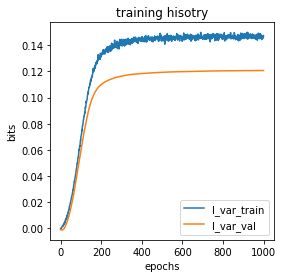

In [14]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values

# Compute likelihood information
I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
#ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
#ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
#ax.set_ylim([0, I_pred*1.2]);

In [15]:
interaction_term = model.get_nn().layers[2].get_weights()[4]
crp_weights = model.get_nn().layers[2].get_weights()[2][0]
rnap_weights = model.get_nn().layers[2].get_weights()[3][0]
print(f'interaction term = {interaction_term[0]:.3f} k_cal/mol')

interaction term = 1.184 k_cal/mol


In [16]:
model.get_nn().layers[2].get_weights()[5]

array([1.556211], dtype=float32)

In [17]:
TF_df = pd.DataFrame(crp_weights,columns=model.alphabet)
rnap_df = pd.DataFrame(rnap_weights,columns=model.alphabet)

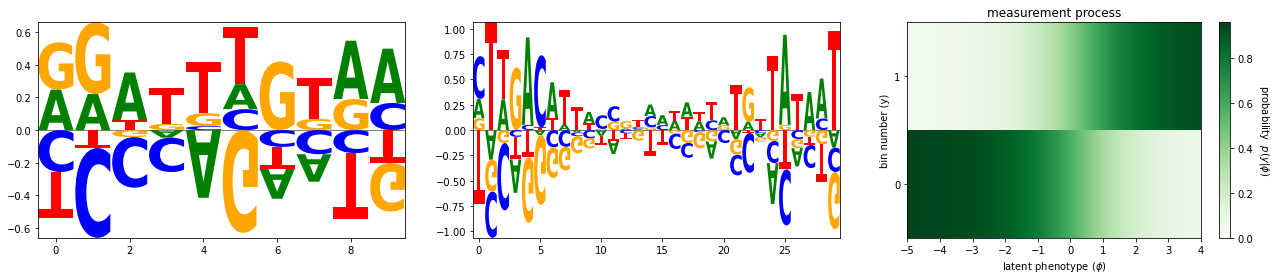

In [22]:
# # Get G-P map parameters in matrix form
# theta = model.get_theta(gauge='uniform')

# Create grid in phi space
phi_lim = [-5, 4]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = model.model.Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
measurement_process = model.p_of_y_given_phi(y_all, phi_grid)

# # Create figure with two panels
fig, axs = plt.subplots(1,3,figsize=[18,4])

logomaker.Logo(TF_df,ax=axs[0],center_values=True)
logomaker.Logo(-rnap_df,ax=axs[1],center_values=True)

# # Right panel: draw measurement process as heatmap
ax = axs[2]
im = ax.imshow(measurement_process,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process')
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout(w_pad=3)
fig.savefig('thermodynmic_custom_gpmap_mpa_visualization_Ireland_2020.png',bbox_index='tight',dpi=300)
# plt.show()

In [19]:
rnap_2010_logo = pd.read_csv('Ireland_2020/rnap_tau_final_all.41.txt', delim_whitespace=True,index_col=[0])
rnap_2010_logo.columns = ['A','C','G','T']

Text(0.5, 1.0, 'Kinney 2010')

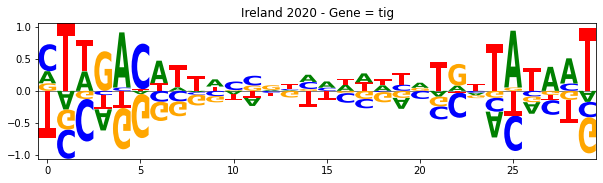

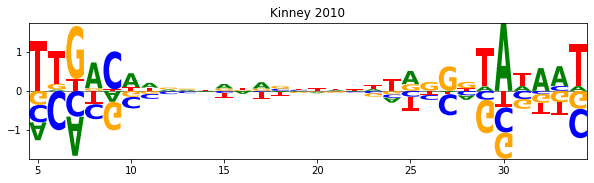

In [20]:
rnap_inferred_centered = logomaker.Logo(-rnap_df,center_values=True).df.values
plt.title(f'Ireland 2020 - Gene = {gene_name}')
rnap_2010_centered = logomaker.Logo(-rnap_2010_logo.loc[5:34],center_values=True).df.values
plt.title('Kinney 2010')

0.6730888853310111


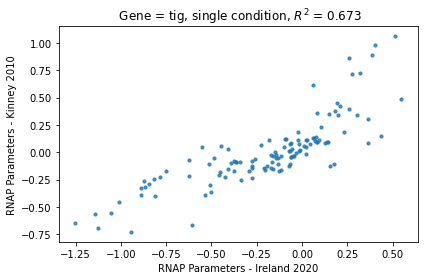

In [21]:
Rsq = np.corrcoef(-rnap_df.values.ravel(),rnap_inferred_centered.ravel())[0][1]**2
print(Rsq)
plt.scatter(-rnap_df.values.ravel(),rnap_inferred_centered.ravel(),s=10,alpha=0.8,color='C0')
plt.xlabel('RNAP Parameters - Ireland 2020')
plt.ylabel('RNAP Parameters - Kinney 2010')
plt.title(f' Gene = {gene_name}, single condition, $R^2$ = {Rsq:.3f}')
plt.tight_layout()
plt.savefig('Ireland_2020_thermodynamic_gpmap_single_condition.png',bbox_inches='tight', dpi=200)
plt.show()